# **NLP Dataset Emotion in Text**


In [51]:
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv("/content/Emotion_final.csv")
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [15]:
print("data size = ", df.shape)

data size =  (21459, 2)


In [16]:
#convert df to numpy array
df_cat = pd.get_dummies(df["Emotion"])
df_new = pd.concat([df, df_cat], axis = 1)
df_new.drop(columns="Emotion", inplace=True)
df_new.head()

,Text,anger,fear,happy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0


In [24]:
text = df_new["Text"].values
label = df_new[["anger", "fear", "happy", "love", "sadness", "surprise"]].values
print(text.shape)
print(label.shape)

(21459,)
(21459, 6)


In [26]:
#train test split
from sklearn.model_selection import train_test_split
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size = 0.2)

In [31]:
#Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #for the same length sequences

tokenizer = Tokenizer(num_words=30000, oov_token="-")
tokenizer.fit_on_texts(text_train) 
tokenizer.fit_on_texts(text_test)

sequence_train = tokenizer.texts_to_sequences(text_train)
sequence_test = tokenizer.texts_to_sequences(text_test)

padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)


(17167, 66)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=30000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
import tensorflow as tf
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(input_dim = 30000, output_dim=16),
      tf.keras.layers.LSTM(64),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(6, activation="softmax")
])
#compile model
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
#Using Callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy")>0.9 and logs.get("val_accuracy")>0.9):
      print("Accuracy reach 90% or above. Stop training!")
      self.model.stop_training = True
callbacks = myCallback()

In [53]:
#Train the model
history = model.fit(padded_train, label_train, epochs = 30, callbacks = [callbacks], validation_data = (padded_test, label_test), verbose = 2)

Epoch 1/30
537/537 - 19s - loss: 0.0118 - accuracy: 0.9950 - val_loss: 0.6627 - val_accuracy: 0.8986
Epoch 2/30
537/537 - 19s - loss: 0.0075 - accuracy: 0.9964 - val_loss: 0.7361 - val_accuracy: 0.8963
Epoch 3/30
537/537 - 19s - loss: 0.0162 - accuracy: 0.9951 - val_loss: 0.5963 - val_accuracy: 0.8975
Epoch 4/30
537/537 - 19s - loss: 0.0083 - accuracy: 0.9961 - val_loss: 0.6783 - val_accuracy: 0.8968
Epoch 5/30
537/537 - 19s - loss: 0.0061 - accuracy: 0.9974 - val_loss: 0.7131 - val_accuracy: 0.9028
Accuracy reach 90% or above. Stop training!


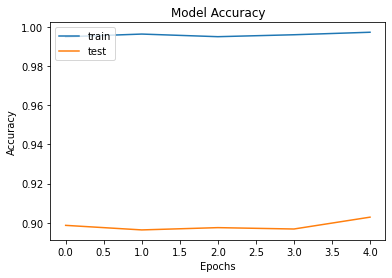

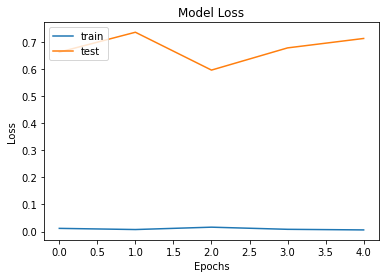

In [60]:
#Accuracy plot
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

#Loss plot
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"], loc="upper left")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()